# 機械学習　第８章　実習問題（回帰）

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 問題文に従って各問題ごとにセルを複数追加してプログラムを実装してください。

## ※ 準備作業
### ▶ 以下を実施してください。

In [3]:
cd data

/content/data


In [ ]:
# ドライブのマウント
# ディレクトリの作成
# ディレクトリへの移動
# house_rent.csv のアップロード

## ※ matplotlib日本語化のためのライブラリのインストール
### ▶ 以下を実行してください。

In [4]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 8.2 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=64de9b25b1b06c2edfab5f3a5291284752d7faad3a5d7e63ccc92a7b8c3fac00
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


## データ分析対象データ

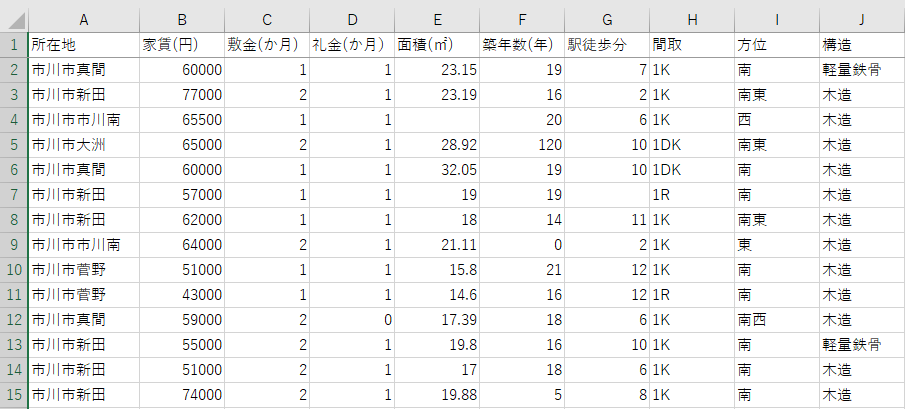

### ■ 正解データ　：　家賃（円）
### ■ 特徴量候補　：　所在地、敷金（か月）、礼金（か月）、面積（㎡）、築年数（年）、駅徒歩、間取、方位、構造

## 問題１　本データのデータ分析において使用する各種ライブラリをインポートしてください。
## また、グラフ表示が同一タブ上に表示されるようにしてください。

In [5]:
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import japanize_matplotlib 

## 問題２　CSVファイル house_rent.csv を読み込んでください。ただし、エンコーディングは cp932 を使用してください。

In [6]:
df = pd.read_csv('house_rent.csv', encoding='cp932')

## 問題３　読み込んだCSVファイルの先頭５行と末尾５行を表示してください。

In [7]:
df.head(5)

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造
0,市川市真間,60000,1,1.0,23.15,19.0,7.0,1K,南,軽量鉄骨
1,市川市新田,77000,2,1.0,23.19,16.0,2.0,1K,南東,木造
2,市川市市川南,65500,1,1.0,NaN,20.0,6.0,1K,西,木造
3,市川市大洲,65000,2,1.0,28.92,120.0,10.0,1DK,南東,木造
4,市川市真間,60000,1,1.0,32.05,19.0,10.0,1DK,南,木造


In [8]:
df.tail(5)

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造
299,市川市新田,64000,2,1.0,22.01,NaN,5.0,1R,南,木造
300,市川市新田,52000,1,0.0,18.02,25.0,13.0,1K,南東,軽量鉄骨
301,市川市新田,57000,1,1.0,21.70,20.0,10.0,1K,南,木造
302,市川市真間,60000,1,1.0,20.37,13.0,14.0,1K,西,鉄骨造
303,市川市新田,72000,2,1.0,20.70,0.0,2.0,1K,東,鉄骨造


## 問題４　質的データの列をすべて挙げてください。つぎに、それらの列にデータが何種類あるかを調べて表示してください。

In [9]:
col = ['所在地','間取','方位','構造']
df[col]

,所在地,間取,方位,構造
0,市川市真間,1K,南,軽量鉄骨
1,市川市新田,1K,南東,木造
2,市川市市川南,1K,西,木造
3,市川市大洲,1DK,南東,木造
4,市川市真間,1DK,南,木造
...,...,...,...,...
299,市川市新田,1R,南,木造
300,市川市新田,1K,南東,軽量鉄骨
301,市川市新田,1K,南,木造
302,市川市真間,1K,西,鉄骨造


In [10]:
print('所在地 :',len(df['所在地'].unique()),'種類')
print('間取 :',len(df['間取'].unique()),'種類')
print('方位 :',len(df['方位'].unique()),'種類')
print('構造 :',len(df['構造'].unique()),'種類')

所在地 : 10 種類
間取 : 3 種類
方位 : 7 種類
構造 : 4 種類


## 問題５　質的データをすべてダミー化してデータ分析させるデータフレームを作成して下さい。次に、作成したデータフレームの先頭５行を表示してください。

In [11]:
dmy = pd.get_dummies(df[col],drop_first=True)
df2 = pd.concat([df, dmy],axis = 1)
df2 = df2.drop(col, axis=1)
df2.head(5)

,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,所在地_市川市平田,所在地_市川市新田,所在地_市川市真間,所在地_市川市菅野,所在地_市川市須和田,間取_1K,間取_1R,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_軽量鉄骨,構造_鉄骨造
0,60000,1,1.0,23.15,19.0,7.0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,77000,2,1.0,23.19,16.0,2.0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
2,65500,1,1.0,NaN,20.0,6.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,65000,2,1.0,28.92,120.0,10.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60000,1,1.0,32.05,19.0,10.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


## 問題６　問題５で作成したデータフレームにおいて、訓練データ、検証データ、テストデータに分割してください。
### ただし、訓練データとテストデータの比率は８：２、乱数シードは０とします。

In [12]:
#train_val ⇒ 訓練データ＆検証データ、test ⇒ テストデータ。
#testはしばらく使わない。
train_val, test = train_test_split(df2, test_size=0.2, random_state=0)

## 問題７　訓練データにおいて、欠損値を確認して表示し、平均値で穴埋めしてください。欠損値処理した訓練データの先頭５行を表示してください。

In [13]:
print('【訓練データの欠損値数】')
print(train_val.isnull().sum()) #訓練データの欠損値数の表示

【訓練データの欠損値数】
家賃(円)         0
敷金(か月)        0
礼金(か月）        0
面積(㎡)         1
築年数(年)        1
駅徒歩分          1
所在地_市川市大洲     0
所在地_市川市大町     0
所在地_市川市市川     0
所在地_市川市市川南    0
所在地_市川市平田     0
所在地_市川市新田     0
所在地_市川市真間     0
所在地_市川市菅野     0
所在地_市川市須和田    0
間取_1K         0
間取_1R         0
方位_北東         0
方位_南          0
方位_南東         0
方位_南西         0
方位_東          0
方位_西          0
構造_軽量鉄骨       0
構造_鉄骨造        0
dtype: int64


In [14]:
train_val_mean = train_val.mean() #平均の算出
train_val2 = train_val.fillna(train_val_mean) #平均値で穴埋め
print('【欠損値処理後の訓練データ】')
train_val2.head(5) #欠損値処理後の訓練データの先頭５行

【欠損値処理後の訓練データ】


,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,所在地_市川市平田,所在地_市川市新田,所在地_市川市真間,所在地_市川市菅野,所在地_市川市須和田,間取_1K,間取_1R,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_軽量鉄骨,構造_鉄骨造
176,69000,2,1.0,19.87,1.0,2.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
26,70000,2,2.0,31.53,28.0,8.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
74,65000,2,1.0,28.92,12.0,10.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
101,51000,1,1.0,20.50,20.0,2.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
154,72000,2,1.0,20.70,0.0,2.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


## 問題８　外れ値処理をしてください。
### ただし、処理過程を説明できるようにセルを構成してください。

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


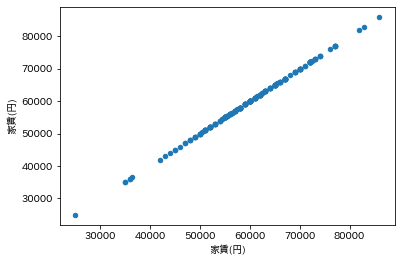

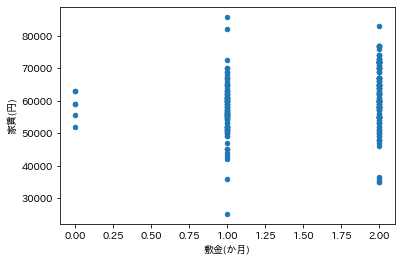

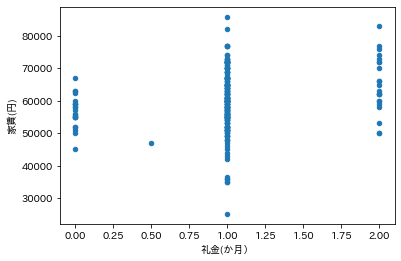

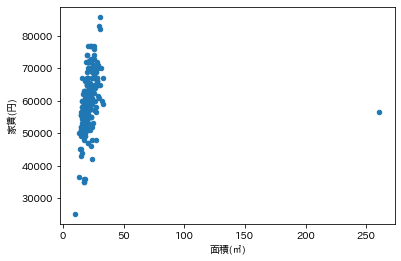

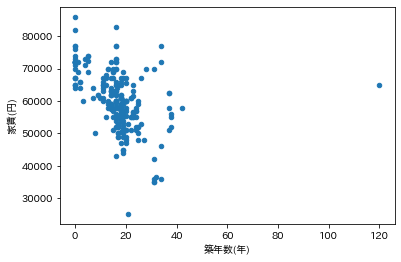

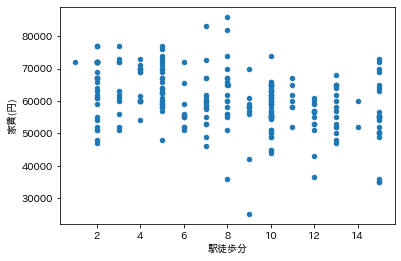

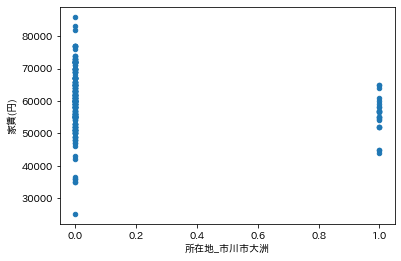

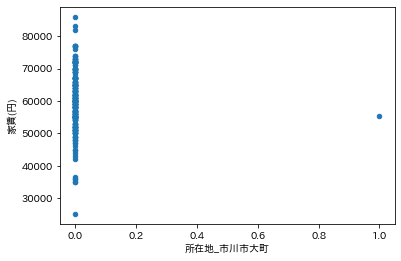

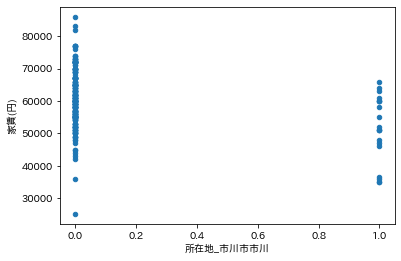

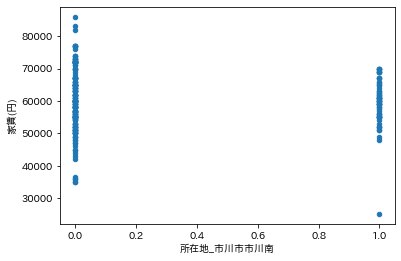

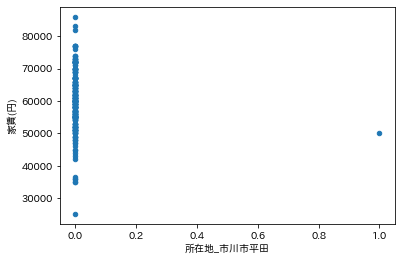

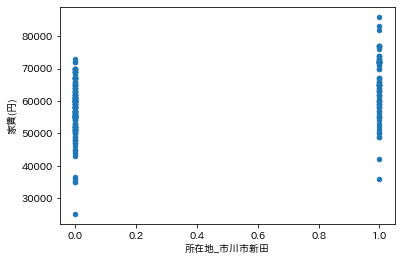

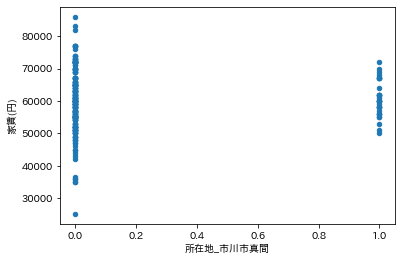

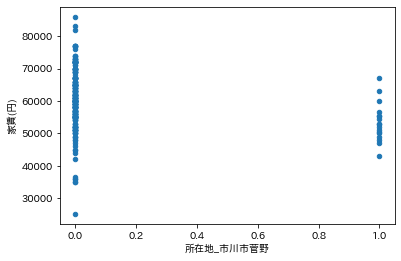

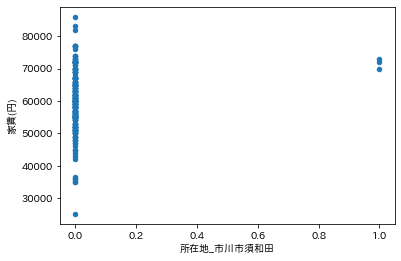

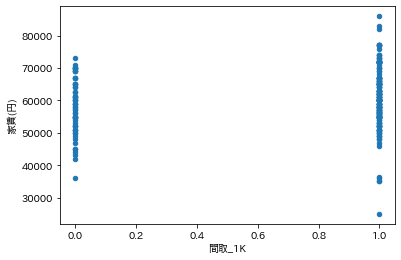

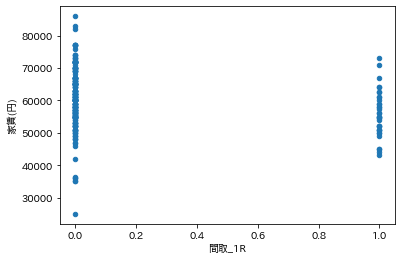

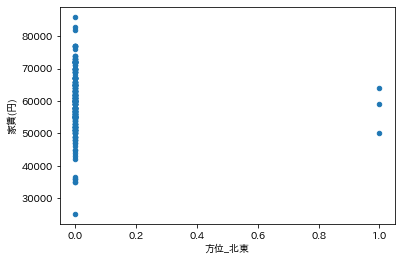

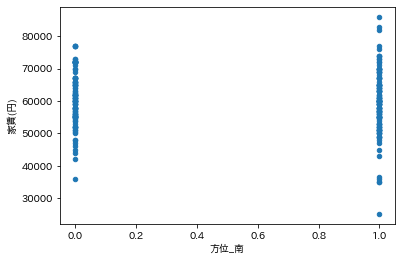

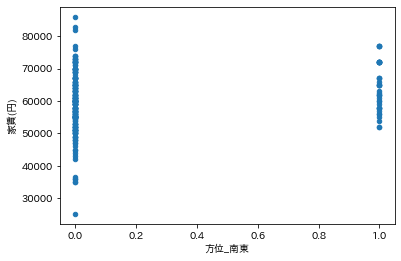

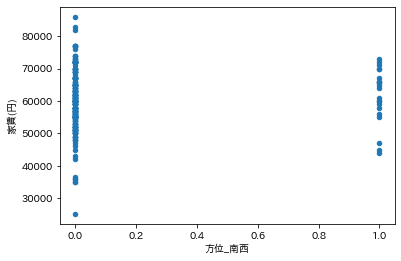

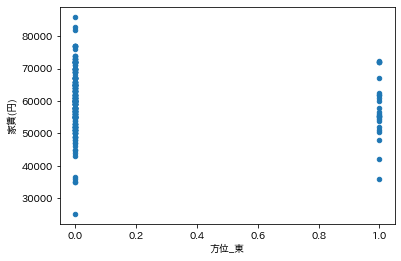

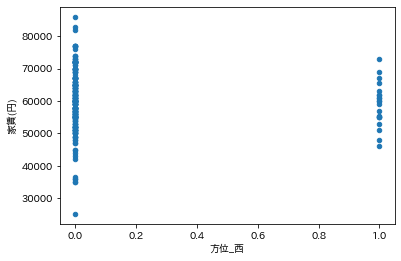

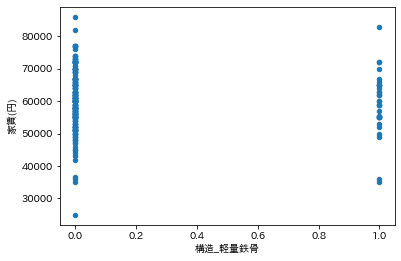

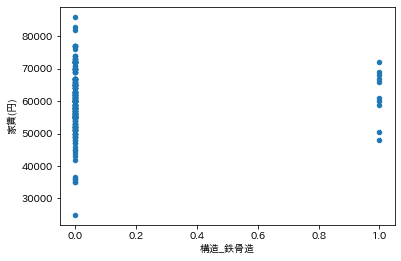

In [15]:
#各特徴量の列と家賃(円)列の相関関係を示す散布図を描く
colname = train_val2.columns 
for name in colname:
  train_val2.plot(kind = 'scatter', x = name, y = '家賃(円)')

In [54]:
#外れ値が存在するインデックスを確認する
#面積(㎡)の外れ値
out_line1 = train_val2[(train_val2['面積(㎡)'] > 250)].index
#築年数(年)の外れ値
out_line2 = train_val2[(train_val2['築年数(年)'] > 40)].index
#家賃(円)の外れ値
out_line3 = train_val2[(train_val2['家賃(円)'] < 30000)].index
print(out_line1, out_line2, out_line3)

Int64Index([95], dtype='int64') Int64Index([16, 3], dtype='int64') Int64Index([224], dtype='int64')


In [55]:
#外れ値を削除する
train_val3 = train_val2.drop([95], axis = 0) #面積(㎡)の外れ値を削除
train_val3 = train_val3.drop([16], axis = 0) #築年数(年)の外れ値を削除
train_val3 = train_val3.drop([3], axis = 0) #築年数(年)の外れ値を削除
train_val3 = train_val3.drop([224], axis = 0) #家賃(円)の外れ値を削除

## 問題９　外れ値処理の結果を表示してください。

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


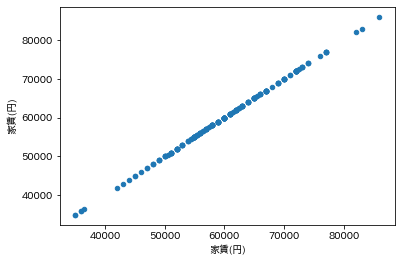

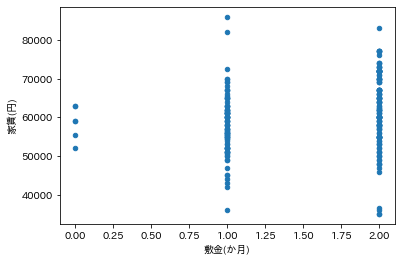

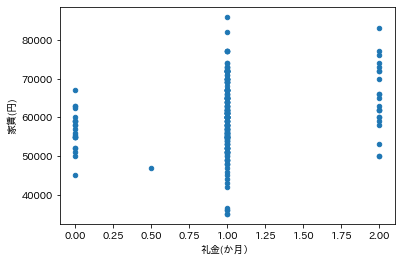

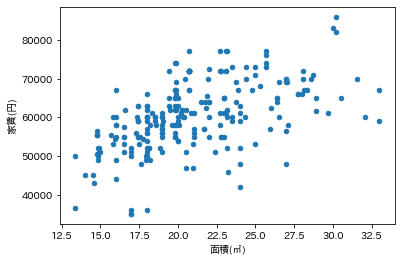

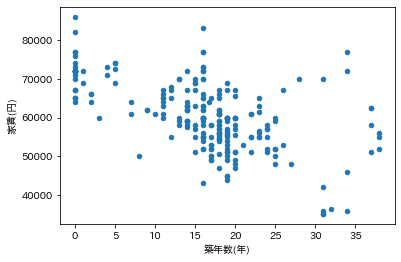

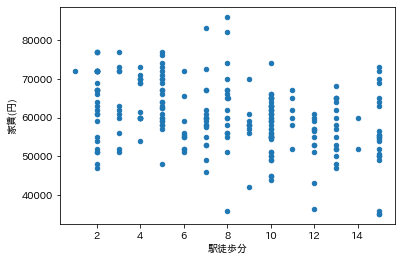

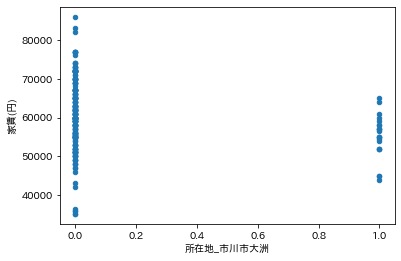

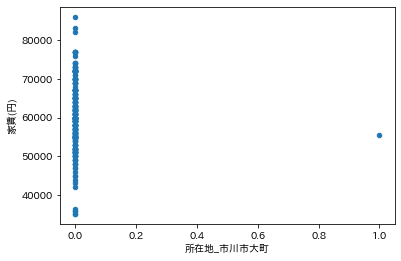

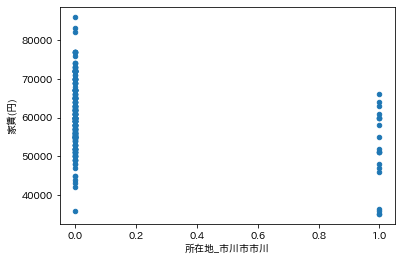

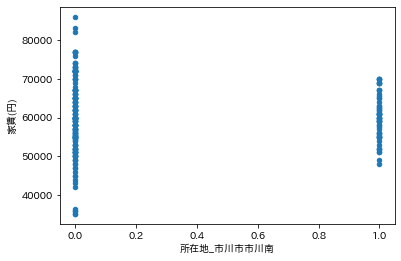

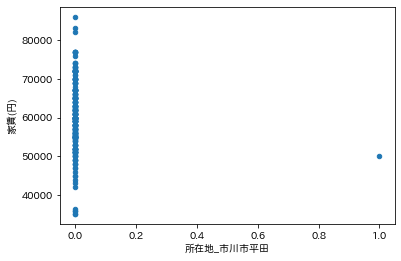

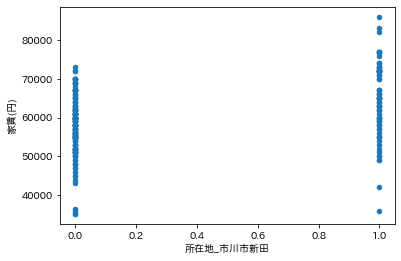

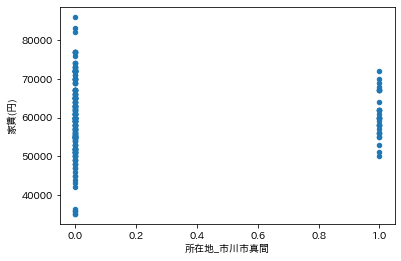

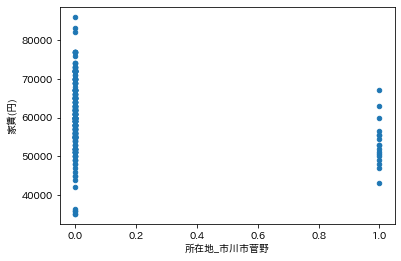

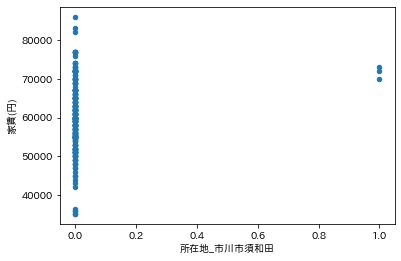

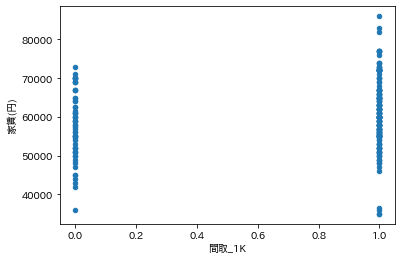

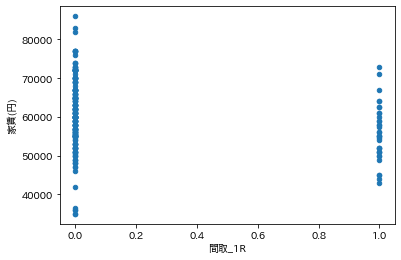

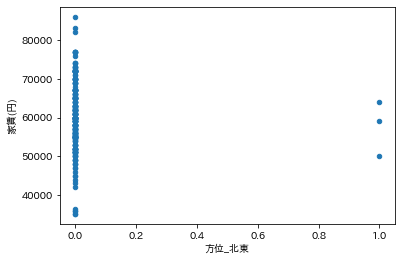

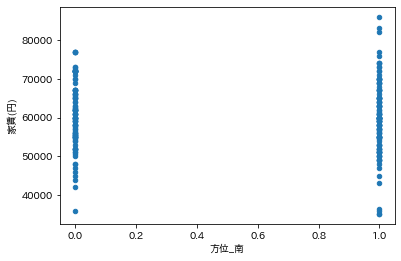

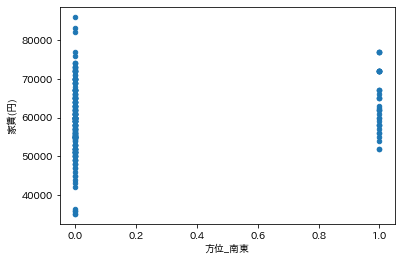

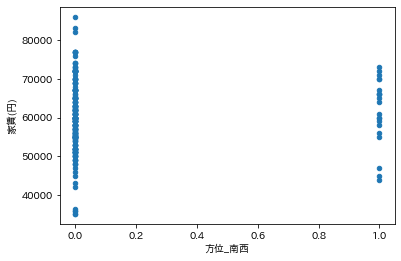

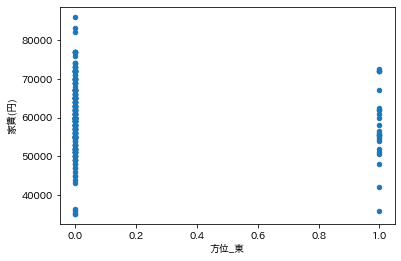

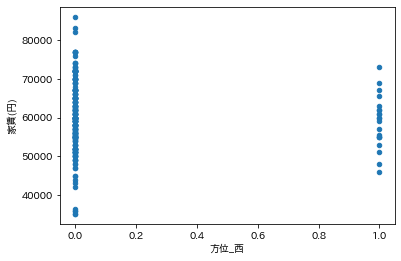

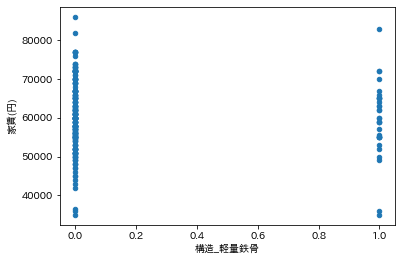

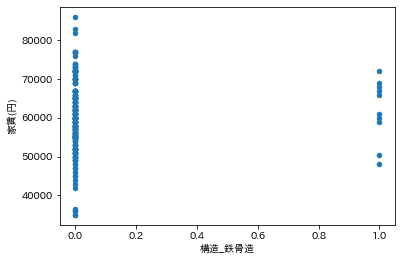

In [56]:
#各特徴量の列と家賃(円)列の相関関係を示す散布図を描く
colname2 = train_val3.columns 
for name in colname2:
  train_val3.plot(kind = 'scatter', x = name, y = '家賃(円)')

## 問題１０　正解データと各特徴量の相関関係を説明できるように表示してください。

In [57]:
#各列と家賃(円)の相関係数を表示
train_cor = train_val3.corr()['家賃(円)']
train_cor

家賃(円)         1.000000
敷金(か月)        0.211546
礼金(か月）        0.214683
面積(㎡)         0.536888
築年数(年)       -0.572762
駅徒歩分         -0.374011
所在地_市川市大洲    -0.185142
所在地_市川市大町    -0.036003
所在地_市川市市川    -0.296835
所在地_市川市市川南   -0.011199
所在地_市川市平田    -0.076853
所在地_市川市新田     0.384767
所在地_市川市真間     0.011868
所在地_市川市菅野    -0.218981
所在地_市川市須和田    0.146236
間取_1K         0.157877
間取_1R        -0.209042
方位_北東        -0.034631
方位_南         -0.062919
方位_南東         0.210174
方位_南西         0.046922
方位_東         -0.102895
方位_西         -0.049608
構造_軽量鉄骨      -0.038858
構造_鉄骨造        0.040771
Name: 家賃(円), dtype: float64

In [58]:
#家賃(円)列との相関係数を絶対値に変換
abs_cor = train_cor.map(abs)
#降順に並べ替え
abs_cor.sort_values(ascending=False)

家賃(円)         1.000000
築年数(年)        0.572762
面積(㎡)         0.536888
所在地_市川市新田     0.384767
駅徒歩分          0.374011
所在地_市川市市川     0.296835
所在地_市川市菅野     0.218981
礼金(か月）        0.214683
敷金(か月)        0.211546
方位_南東         0.210174
間取_1R         0.209042
所在地_市川市大洲     0.185142
間取_1K         0.157877
所在地_市川市須和田    0.146236
方位_東          0.102895
所在地_市川市平田     0.076853
方位_南          0.062919
方位_西          0.049608
方位_南西         0.046922
構造_鉄骨造        0.040771
構造_軽量鉄骨       0.038858
所在地_市川市大町     0.036003
方位_北東         0.034631
所在地_市川市真間     0.011868
所在地_市川市市川南    0.011199
Name: 家賃(円), dtype: float64

## 問題１１　正解データと特徴量を抽出し、それぞれの先頭５行を表示してください。

In [62]:
#特徴量⇒築年数、面積、駅徒歩分、正解データ⇒家賃
col2 = ['築年数(年)','面積(㎡)','駅徒歩分','家賃(円)'] 

train_val4 = train_val3[col2]
train_val4.head(5)

,築年数(年),面積(㎡),駅徒歩分,家賃(円)
176,1.0,19.87,2.0,69000
26,28.0,31.53,8.0,70000
74,12.0,28.92,10.0,65000
101,20.0,20.50,2.0,51000
154,0.0,20.70,2.0,72000


## 問題１２　問題１１で抽出した正解データと特徴量を使用して、訓練データと検証データに分割してください。
### ただし、訓練データと検証データの比率は８：２、乱数シードは０とします。

In [63]:
#特徴量
col3 = ['築年数(年)','面積(㎡)','駅徒歩分'] 
x = train_val4[col3] 
#正解データ
t = train_val4[['家賃(円)']] 

#訓練データと検証データに分割
x_train, x_val, y_train, y_val = train_test_split(x, t, test_size = 0.2, random_state = 0)

## 問題１３　線形重回帰モデルを使用して学習させ、検証データで決定係数を求めて表示してください。

In [64]:
#線形重回帰モデルを使用した学習
model = LinearRegression()
model.fit(x_train, y_train)
#決定係数の算出
model.score(x_val, y_val)

0.7498424936934198

## 問題１４　問題１３で学習したモデルを使用して以下のデータを使用して家賃がいくらになるか予測させてください。
### 予測させるデータは以下の通りです。
#### 敷金：１か月
#### 礼金；１か月
#### 面積：３０㎡
#### 築年数：３年
#### 駅徒歩分：１０分
#### 所在地：市川市新田
#### 間取：１DK
#### 方位：南向き
#### 構造：鉄骨造


In [98]:
new = [[3, 30, 10]]
model.predict(new)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[75044.60068777]])

## 問題１５　特徴量エンジニアリングで訓練データと検証データの決定係数が特徴量エンジニアリングを行う前より良くなるようにしてください。
### ただし、特徴量エンジニアリングの過程が理解できるようにセルを構成してください。

In [107]:
from sklearn.preprocessing import StandardScaler

#learn関数の定義
def learn(x, t):
  x_train, x_val, y_train, y_val = train_test_split(x, t, test_size = 0.2, random_state = 0)
  
  #訓練データを標準化
  sc_model_x = StandardScaler()
  sc_model_y = StandardScaler()
  sc_model_x.fit(x_train)
  sc_x_train = sc_model_x.transform(x_train)
  sc_model_y.fit(y_train)
  sc_y_train = sc_model_y.transform(y_train)

  #学習
  model = LinearRegression()
  model.fit(sc_x_train, sc_y_train)

  #検証データを標準化
  sc_x_val = sc_model_x.transform(x_val)
  sc_y_val = sc_model_y.transform(y_val)
    
  #訓練データと検証データの決定係数計算
  train_score = model.score(sc_x_train, sc_y_train)
  val_score = model.score(sc_x_val, sc_y_val)

  return train_score, val_score

In [108]:
#learn関数を実行する
x = train_val3.loc[:, ['築年数(年)','面積(㎡)', '駅徒歩分']]
t = train_val3[['家賃(円)']]

s1, s2 = learn(x, t)
print(s1, s2)

0.575171161311935 0.7498424936934196


In [109]:
#特徴量を２乗したデータ列を追加して再学習
x['築年数(年)2'] = x['築年数(年)'] ** 2
s1, s2 = learn(x, t)
print(s1, s2)
x['面積(㎡)2'] = x['面積(㎡)'] ** 2
s1, s2 = learn(x, t)
print(s1, s2)
x['駅徒歩分2'] = x['駅徒歩分'] ** 2
s1, s2 = learn(x, t)
print(s1, s2)

0.5751712085317613 0.7498634958374517
0.5827117181551471 0.7509149094474947
0.5853248194483025 0.7508728562444391


In [110]:
#交互作用特徴量を追加して再学習
x['築年数(年) * 面積(㎡)'] = x['築年数(年)'] * x['面積(㎡)']
s1, s2 = learn(x, t)
print(s1, s2)

0.591042599767196 0.7499447057105059


In [111]:
#特徴量を３乗したデータ列を追加して再学習
x['築年数(年)3'] = x['築年数(年)'] ** 3
s1, s2 = learn(x, t)
print(s1, s2)

0.6169234602256213 0.7715428084086196


## 問題１６　チューニング結果を受けて、データの標準化後再学習をしてください。

In [112]:
#訓練データと検証データを合わせて再学習
#再度、標準化
sc_model_x2 = StandardScaler()
sc_model_x2.fit(x)
sc_x = sc_model_x2.transform(x)

sc_model_y2 = StandardScaler()
sc_model_y2.fit(t)
sc_y = sc_model_y2.transform(t)
model = LinearRegression()
model.fit(sc_x, sc_y)

LinearRegression()

## 問題１７　テストデータを使用してモデルを評価してください。
## ただし、決定係数の値が 0.65 以上となるようにしてください。

In [113]:
#テストデータの前処理
test2 = test.fillna(train_val.mean()) #欠損値を平均値で補完
x_test = test2.loc[:, ['築年数(年)','面積(㎡)', '駅徒歩分']]
y_test = test2[['家賃(円)']]

x_test['築年数(年)2'] = x_test['築年数(年)'] ** 2
x_test['面積(㎡)2'] = x_test['面積(㎡)'] ** 2
x_test['駅徒歩分2'] = x_test['駅徒歩分'] ** 2

x_test['築年数(年) * 面積(㎡)'] = x_test['築年数(年)'] * x_test['面積(㎡)']

x_test['築年数(年)3'] = x_test['築年数(年)'] ** 3

sc_x_test = sc_model_x2.transform(x_test)
sc_y_test = sc_model_y2.transform(y_test)

#決定係数を計算する
model.score(sc_x_test, sc_y_test)

0.6831994755610118

## 問題１８　モデルとStandardScalerオブジェクトを保存してください。
### ただし、モデルは house_rent.pkl、StandardScalerオブジェクトは house_rent_scx と house_rent_scy とします。

In [114]:
import pickle
with open('house_rent.pkl', 'wb') as f:
  pickle.dump(model, f)
with open('house_rent_scx.pkl', 'wb') as f:
  pickle.dump(sc_model_x2, f)
with open('house_rent_scy.pkl', 'wb') as f:
  pickle.dump(sc_model_y2, f)